In [99]:
import numpy as np
import pandas as pd
import glob
import os

# dataset from https://www.kaggle.com/robikscube/hourly-energy-consumption

# using pjm_hourly_est.csv file because it has the records of the whole PJM region
df = pd.read_csv('data/pjm_hourly_est.csv')


# sort by date
df.sort_values(by=['Datetime'], inplace=True)

# set Datetime as index
df.set_index('Datetime', inplace=True)


df.head()

,AEP,COMED,DAYTON,DEOK,DOM,DUQ,EKPC,FE,NI,PJME,PJMW,PJM_Load
Datetime,,,,,,,,,,,,
1998-04-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22259.0
1998-04-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21244.0
1998-04-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20651.0
1998-04-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20421.0
1998-04-01 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20713.0


In [100]:
# describing the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AEP,121273.0,15499.513717,2591.399065,9581.0,13630.0,15310.0,17200.00,25695.0
COMED,66497.0,11420.152112,2304.139517,7237.0,9780.0,11152.0,12510.00,23753.0
DAYTON,121275.0,2037.851140,393.403153,982.0,1749.0,2009.0,2279.00,3746.0
DEOK,57739.0,3105.096486,599.859026,907.0,2687.0,3013.0,3449.00,5445.0
DOM,116189.0,10949.203625,2413.946569,1253.0,9322.0,10501.0,12378.00,21651.0
DUQ,119068.0,1658.820296,301.740640,1014.0,1444.0,1630.0,1819.00,3054.0
EKPC,45334.0,1464.218423,378.868404,514.0,1185.0,1386.0,1699.00,3490.0
FE,62874.0,7792.159064,1331.268006,0.0,6807.0,7700.0,8556.00,14032.0
NI,58450.0,11701.682943,2371.498701,7003.0,9954.0,11521.0,12896.75,23631.0
PJME,145366.0,32080.222831,6464.012166,14544.0,27573.0,31421.0,35650.00,62009.0


In [101]:
# check for missing values
df.isnull().sum()

AEP          56989
COMED       111765
DAYTON       56987
DEOK        120523
DOM          62073
DUQ          59194
EKPC        132928
FE          115388
NI          119812
PJME         32896
PJMW         35056
PJM_Load    145366
dtype: int64

In [102]:
# check for duplicates
df.duplicated().sum()

16181

[Text(0.5, 0, 'Load'), Text(0, 0.5, 'Frequency')]

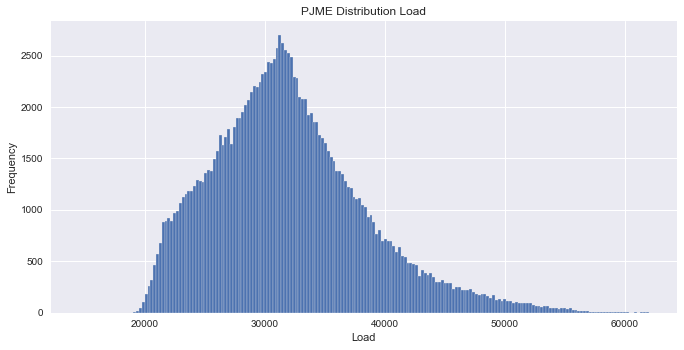

In [117]:
import matplotlib.pyplot as plt

# styling the plots
plt.style.use('seaborn')

# plot the data
df['PJME'].plot.hist(bins=200, figsize=(10, 5), title='PJME Distribution Load').set(xlabel='Load', ylabel='Frequency')

[Text(0.5, 0, 'Load'), Text(0, 0.5, 'Frequency')]

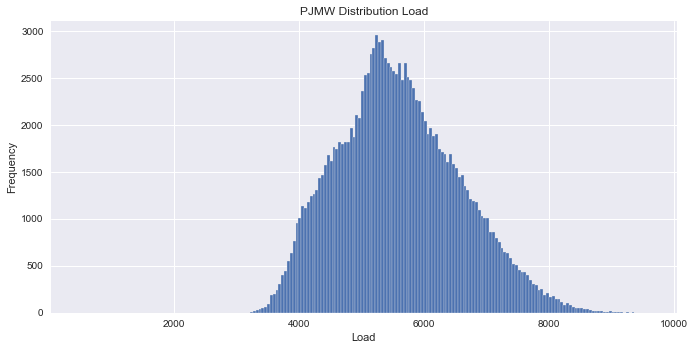

In [118]:
df['PJMW'].plot.hist(bins=200, figsize=(10, 5), title='PJMW Distribution Load').set(xlabel='Load', ylabel='Frequency')

<AxesSubplot:title={'center':'Distribution of Load by Region'}, ylabel='Frequency'>

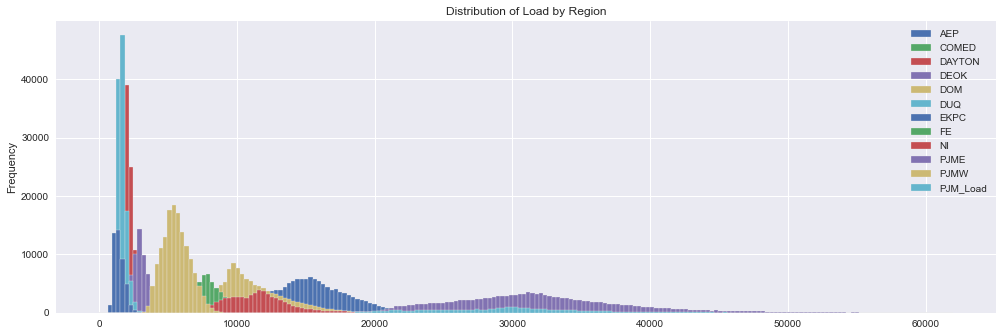

In [119]:
df.plot.hist(figsize=(15, 5), bins=200, title='Distribution of Load by Region')

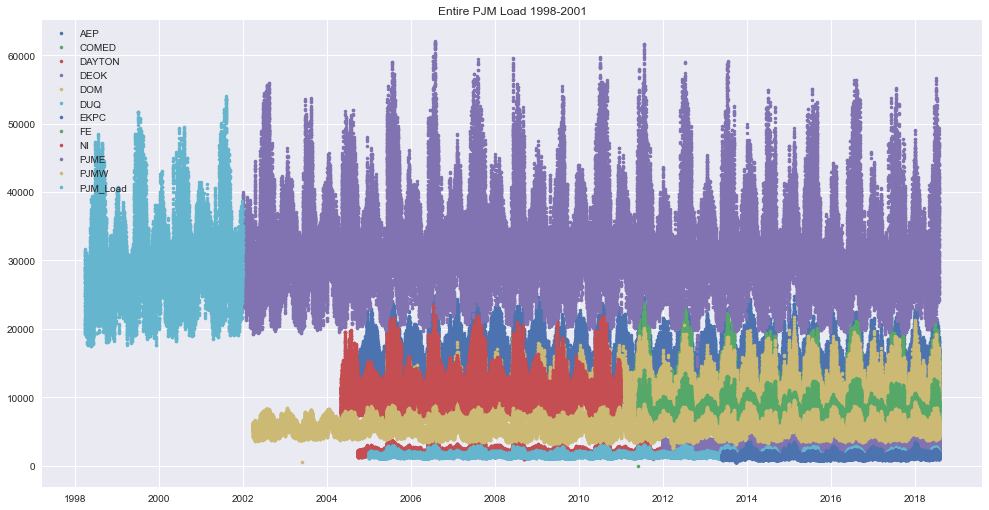

In [116]:
from matplotlib.dates import DateFormatter
from matplotlib.dates import YearLocator

# remove hours from the index
df.index = pd.to_datetime(df.index).date

# plot the data
plot = df.plot(style='.', figsize=(15, 8), title='Entire PJM Load 1998-2001')

# format the x axis to YYYY
plot.xaxis.set_major_formatter(DateFormatter('%Y'))

# format the x axis to show every 2 years
plot.xaxis.set_major_locator(YearLocator(2))

plt.show()
